# Extraccion de los Alimentos

In [1]:
import pandas as pd
import random as rn
df = pd.read_excel('Alimentos.xlsx')
Almuerzo = df.loc[:,'Tipo']=="Almuerzo"
Comida = df.loc[:,'Tipo']=="Comida"
Cena = df.loc[:,'Tipo']=="Cena"
Almuerzo = df.loc[Almuerzo]
Comida = df.loc[Comida]
Cena = df.loc[Cena]
#print(len(Cena))
#print(Cena.iloc[50][0])
#print(df_almuerzo.iloc[0][0])

def obtenerGET(peso,altura,sexo,ejercicio):
  """
  peso(kg),
  altura(cms),
  sexo h/m
  ejercicio :
    1 : sedentario, nada de ejercicio
    2 : Ligero activo, 1 a 3 veces por semana
    3 : Moderado activo, 3 a 5 veces por semana
    4 : muy activas, 6 a 7 dias por semana
    5 : hiperactivas, al menos 2 horas al dia intenso

  Las edades que maneja son de 8 a 12 
  """
  AF= [1.2,1.375,1.55,1.725,1.9] #Actividdad fisica
  if sexo == "h":#3 a
    GER = (19.59*peso) + (1.303 * altura) + 414.9#peso(kg),altura(cm)
  else:
    GER = (16.969*peso) + (1.618*altura) + 371.2
  #print(AF[ejercicio-1])
  ETA = GER * .10
  GET = GER * AF[ejercicio-1] + ETA

  return GET
def obtenerIMC(Edad,Meses,Sexo):
    ninas = [[10,6,16.25],[10,12,16.55],[11,6,16.9],[11,12,17.2],[12,6,17.6],[12,12,18]]
    ninos = [[10,6,16.1],[10,12,16.35],[11,6,16.65],[11,12,16.85],[12,6,17.2],[12,12,55]]
    if Sexo == "h":
        for i in range(len(ninos)):
            if Edad == ninos[i][0]:
                if Meses <= ninos[i][1]:
                    return ninos[i][2]
    else:
        for i in range(len(ninas)):
            if Edad == ninas[i][0]:
                if Meses <= ninas[i][1]:
                    return ninas[i][2]    
def obtenerCalorias(calendario):
    calorias = 0
    for i in range(4):
        for j in range(7):
            if i == 1:
                calorias = Almuerzo.iloc[calendario[1][j]][2] + calorias
            if i == 2:
                calorias = Comida.iloc[calendario[2][j]][2] + calorias
            if i == 3:
                calorias = Cena.iloc[calendario[3][j]][2] + calorias
            
    return calorias 
def mostrarDieta(calendario):
    for j in range(7):
        print(Almuerzo.iloc[calendario[1][j]][0],Almuerzo.iloc[calendario[1][j]][2]," cal")
        print(Comida.iloc[calendario[2][j]][0],Comida.iloc[calendario[2][j]][2]," cal")
        print(Cena.iloc[calendario[3][j]][0],Cena.iloc[calendario[3][j]][2]," cal")
                

In [2]:
import numpy as np

class Individuo:
  def __init__(self):
    self.genes = np.zeros((4,7)).astype(int)
    self.ftp = Peso #fitness
    self.adp = 0
    self.pi = 0
    self.qi = 0
  def inicializarIndividuo(self):
    """Funcion para inicializar los alimentos"""
    #aqui se llenara con el ejercicio y los alimentos
    for i in range(7):
        self.genes[1][i] = rn.randint(0,len(Almuerzo)-1)
        self.genes[2][i] = rn.randint(0,len(Comida)-1)
        self.genes[3][i] = rn.randint(0,len(Cena)-1)
    self.obtenerAdaptacion()
  def obtenerAdaptacion(self):
    """Funcion para obtener la adaptacion"""
    #obtencion de calorias consumidas en las semanas
    kal=obtenerCalorias(self.genes)#Kalorias semanales simulada
    GET = obtenerGET(Peso,Estatura,Sexo,Ejercicio)#necesarias
    calorias = (kal * NumSemanas) - (GET * 7 * NumSemanas)
    kg = calorias/7000# de cal a kg - 1 kg = 7000 cal
    self.ftp = Peso + kg
    IMC = self.ftp/(Estatura*.01)**2#IMC
    self.adp = abs(IMC-IMC_IDEAL)
    
  def mostrar(self):
    """Funcion para mostrar los individuos"""
    print(f"Genes: {self.genes}, Adp: {self.adp}")
      

In [3]:
class Genetico:
  def __init__(self,tamPob,numIter=10,randomSeed=23,probCruza=.9,seleccion="Ruleta",tipoCruza = "Monopunto",probMutacion=0.3):
    """
    tamPob : numero de individuos(required)
    numIter : numero de iteraciones(defalut: 10)
    randomSeed : semilla de numeros (default: 23)
    seleccion : Tipo de seleccion Ruleta/Gerarquica(default:Ruleta)
    probCruza : default .9
    tipoCruza : Tipo de Cruza Monopunto/Multipunto(default: Monopunto)
    """
    self.randomSeed = randomSeed
    self.tamPob = tamPob
    self.numIter = numIter
    self.seleccion = seleccion
    self.probCruza = probCruza
    self.tipoCruza = tipoCruza
    self.probMutacion = probMutacion
    self.pobInicial = list()
    self.best = list()
    rn.seed(self.randomSeed)

    self.generarPoblacion()
    for i in range(self.numIter):
        self.vecSeleccion = list()
        self.pobHijos = list()
        self.generarSeleccion()
        self.generarCruza()
        self.generarMutacion()
        self.generarElitismo()
        self.best.append(self.pobInicial[0].adp)
        clear_output()
        print(f"{i}/{self.numIter} adp: {self.pobInicial[0].adp}")


  def generarElitismo(self):
    self.pobInicial.extend(self.pobHijos)
    self.ordenar()
    while len(self.pobInicial)!= self.tamPob:
        self.pobInicial.pop()
        
  def generarMutacion(self):
    for i in range(len(self.pobHijos)):
        if rn.uniform(0,1) < self.probMutacion:
            for c in range(7):
                if rn.uniform(0,1) < self.probMutacion:
                    self.pobHijos[i].genes[1][c] = rn.randint(0,len(Almuerzo)-1)#almuerzo
                if rn.uniform(0,1) < self.probMutacion:                        
                    self.pobHijos[i].genes[2][c] = rn.randint(0,len(Comida)-1)#comida
                if rn.uniform(0,1) < self.probMutacion:                        
                    self.pobHijos[i].genes[3][c] = rn.randint(0,len(Cena)-1)#cena  
            self.pobHijos[i].obtenerAdaptacion()
                
  def generarPoblacion(self):
    """Generar la poblacion de tam tamPob"""
    for _ in range(self.tamPob):
      n = Individuo()
      n.inicializarIndividuo()
      self.pobInicial.append(n)
    print("Poblacion Inicial Creada...")
  def generarSeleccion(self):
    """Se generara la seleccion de acuerdo al parametro ingresado seleccion"""
    self.preseleccion()
    if self.seleccion == "Ruleta":
      self.seleccionRuleta(1)
    else:
      self.seleccionGerarquica(1)
    #print("Seleccion Terminada")
  def preseleccion(self):
    "Funcion para inicializar los pi y qi"
    suma = 0
    for i in range(len(self.pobInicial)):
      suma+=self.pobInicial[i].adp
    for i in range(len(self.pobInicial)):
      self.pobInicial[i].pi = self.pobInicial[i].adp/suma
    for i in range(len(self.pobInicial)):
      if i == 0:
        self.pobInicial[i].qi = self.pobInicial[i].pi
      else:
        self.pobInicial[i].qi = self.pobInicial[i].pi+self.pobInicial[i-1].qi
  def seleccionRuleta(self,gen):
    for i in range(self.tamPob*2):
      p1= -1
      p2= -1
      while p1 == p2 or p1==-1 or p2 ==-1:
        ranP1 = rn.uniform(0,1)
        ranP2 = rn.uniform(0,1)
        for j in range(self.tamPob):
          if self.pobInicial[j].qi <= ranP1:
            p1=j
          if self.pobInicial[j].qi <= ranP2:
            p2 = j
      self.vecSeleccion.append(p1)
      self.vecSeleccion.append(p2)
    #print(f"Seleccion {i}/{self.tamPob*2}, Genereacion {gen}, apd {self.pobInicial[0].adp}")


  def seleccionGerarquica(self,gen):
    #ordenar
    self.ordenar()
    self.seleccionRuleta(gen)
  def ordenar(self):
    self.pobInicial.sort(key=lambda x:x.adp)
  def generarCruza(self):
    if self.tipoCruza == "Monopunto":
      self.cruzaMonopunto()
    else: 
      self.cruzaMultipunto()
  
  def cruzaMonopunto(self):
    for i in range(0,len(self.vecSeleccion),2):
      prCr= rn.uniform(0,1)
      if prCr < self.probCruza:
        hijo = Individuo()#Se crea new hijo
        puntoCruza = rn.randint(1,6)#6 tam max de la matriz
        hijo.genes[:,0:puntoCruza] = self.pobInicial[self.vecSeleccion[i]].genes[:,0:puntoCruza]
        hijo.genes[:,puntoCruza:7] = self.pobInicial[self.vecSeleccion[i+1]].genes[:,puntoCruza:7]
        self.pobHijos.append(hijo)
        self.pobHijos[len(self.pobHijos)-1].obtenerAdaptacion()
  def cruzaMultipunto(self):
    # de acuerdo a una probabilidad se le asiganran cromosomas del padre1 o padre 2
    for i in range(0,len(self.vecSeleccion),2):
      prCr= rn.uniform(0,1)
      if prCr < self.probCruza:
        hijo = Individuo()#Se crea new hijo
        for f in range(4):
          for c in range(7):
            ran = np.random.uniform(0,1)
            if ran > .5: #tienen la misma probabilidad de brindar cromosomas
              hijo.genes[f][c] = self.pobInicial[self.vecSeleccion[i]].genes[f][c]
            else:
              hijo.genes[f][c] = self.pobInicial[self.vecSeleccion[i+1]].genes[f][c]
        self.pobHijos.append(hijo)
        self.pobHijos[len(self.pobHijos)-1].obtenerAdaptacion()
          

                        
            


#Para mostrar los comentarios es name function __doc__

In [13]:
from IPython.display import clear_output
NumSemanas = 8
Edad = 12
Meses = 7#meses despues de haber cumplido años
Peso = 63#kg
Estatura =163 #cm
Sexo = "m" #h/m
Ejercicio = 1#1.....5
IMC_IDEAL=obtenerIMC(Edad,Meses,Sexo)
alg=Genetico(tamPob=100,numIter=100,randomSeed=23,probCruza=.9,seleccion="Ruleta",tipoCruza = "Monopunto",probMutacion=0.5)
print(f"Peso Actual: {Peso}")
print(f"Peso Simulado: {alg.pobInicial[0].ftp}")
print(f"IMC Ideal: {IMC_IDEAL}")
print(f"IMC Simulado: {alg.pobInicial[0].ftp/(Estatura*.01)**2}")

99/100 adp: 0.0001729620449175684
Peso Actual: 63
Peso Simulado: 47.82374045714286
IMC Ideal: 18
IMC Simulado: 17.999827037955082


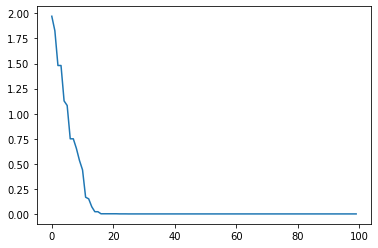

In [8]:
import matplotlib.pyplot as plt
plt.plot(alg.best)

In [14]:
#mostrarDieta(alg.pobInicial[0].genes)

cal=obtenerCalorias(alg.pobInicial[0].genes)
GET=obtenerGET(Peso,Estatura,Sexo,Ejercicio)
print("Calorias mensuales: ",cal*NumSemanas)
print(f"Calorias necesarias mensuales: {GET*7*NumSemanas}")



calorias = (cal * NumSemanas) - (GET * 7 * NumSemanas)
kg = calorias/7000# de cal a kg - 1 kg = 7000 cal
w = Peso + kg
IMC = w/(Estatura*.01)**2#
opIMC = abs(IMC_IDEAL-IMC)
#print("op IMC : ",opIMC)
#print(f"peso simulado: {w}")
#print("Kg: ",kg)
#print(f"Calorias: {calorias}")
#print(alg.pobInicial[0].ftp)
print(mostrarDieta(alg.pobInicial[0].genes))


Calorias mensuales:  17816.0
Calorias necesarias mensuales: 124049.8168
yogurt de fresa 141.0  cal
Bistec ranchero con arroz 139.0  cal
1 Huevo en torta 63.0  cal
1 huevo con 2 rebanadas de jamon de pavo 127.0  cal
Un plato de ensalada 25.0  cal
1 huevo con tomate 88.0  cal
1 huevo con 15 gramos chorizo 127.0  cal
Pollo con sopa de arroz 100.0  cal
1 Huevo con chorizo 127.0  cal
1 huevo con 15 gramos chorizo 127.0  cal
Espagueti con milanesa de pollo 89.0  cal
1 plao de Cereal con leche 215.0  cal
avena con manzana 128.0  cal
1 milanesa de res con arroz 96.0  cal
1 vaso de Avena 77.0  cal
avena con manzana 128.0  cal
1 plato de Picadillo con arroz 114.0  cal
1 huevo con tomate 88.0  cal
1 taza de café 4.0  cal
Espagueti con pollo frito 161.0  cal
1 Huevo en torta 63.0  cal
None


In [ ]:
print()